In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ctgan import CTGAN
from ctgan import load_demo
import data_describe as dd
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = pd.read_csv('../data/S&P 500 Information Technology 100-Day.csv')
data.rename(columns={'Unnamed: 0':'date'}, inplace=True)
data = data.sort_values(by=['date'])
data = data.dropna()
data

,date,S&P 500,S&P 500 Information Technology (Sector),S&P 500 Performance (%),S&P 500 Information Technology (Sector) Performance (%),S&P 500 Information Technology (Sector) Outperform/Underperform,overall,communication,information technology commodities,video and audio,video and audio products,video and audio services
4178,2009-12-02,1109.24,355.410004,-6.892963,-8.536205,UNDERPERFORM,217.488,84.972,100.047,100.483,98.952,101.193
4179,2009-12-03,1099.92,354.839996,-8.854969,-9.558036,UNDERPERFORM,217.488,84.972,100.047,100.483,98.952,101.193
4180,2009-12-04,1105.98,357.910004,-6.801271,-6.680050,OUTPERFORM,217.488,84.972,100.047,100.483,98.952,101.193
4181,2009-12-07,1103.25,355.589996,-8.235323,-8.539317,UNDERPERFORM,217.488,84.972,100.047,100.483,98.952,101.193
4182,2009-12-08,1091.94,353.459991,-6.958078,-6.328511,OUTPERFORM,217.488,84.972,100.047,100.483,98.952,101.193
...,...,...,...,...,...,...,...,...,...,...,...,...
7194,2021-11-24,4701.46,2986.290039,5.426902,13.669900,OUTPERFORM,280.126,76.330,47.997,111.000,37.058,138.038
7195,2021-11-26,4594.62,2908.629883,4.573863,12.659865,OUTPERFORM,280.126,76.330,47.997,111.000,37.058,138.038
7196,2021-11-29,4655.27,2985.409912,8.977288,18.957226,OUTPERFORM,280.126,76.330,47.997,111.000,37.058,138.038
7197,2021-11-30,4567.00,2956.850098,6.305224,16.148030,OUTPERFORM,280.126,76.330,47.997,111.000,37.058,138.038


## Using all data

In [3]:
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data['dow'] = data['date'].dt.dayofweek
data = data[data['dow']==3].groupby(['year','month']).nth[1].reset_index()
data

,year,month,date,S&P 500,S&P 500 Information Technology (Sector),S&P 500 Performance (%),S&P 500 Information Technology (Sector) Performance (%),S&P 500 Information Technology (Sector) Outperform/Underperform,overall,communication,information technology commodities,video and audio,video and audio products,video and audio services,dow
0,2009,12,2009-12-10,1102.35,358.239990,-2.286930,-1.251450,OUTPERFORM,217.488,84.972,100.047,100.483,98.952,101.193,3
1,2010,1,2010-01-14,1148.46,374.720001,8.787618,10.406602,OUTPERFORM,217.281,84.849,99.258,99.515,97.230,100.487,3
2,2010,2,2010-02-11,1078.47,346.339996,1.716544,1.035616,UNDERPERFORM,217.353,84.868,99.067,99.560,96.987,100.634,3
3,2010,3,2010-03-11,1150.24,371.410004,2.657837,3.333058,OUTPERFORM,217.403,84.840,98.406,99.533,96.655,100.714,3
4,2010,4,2010-04-08,1186.44,380.880005,13.110628,15.414682,OUTPERFORM,217.290,84.738,97.553,99.159,95.488,100.615,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2021,7,2021-07-08,4320.82,2631.409912,-7.184331,-11.857668,UNDERPERFORM,273.092,76.056,48.787,111.434,37.720,138.174,3
140,2021,8,2021-08-12,4460.83,2705.919922,-6.940799,-11.324343,UNDERPERFORM,274.214,76.337,49.162,111.585,37.528,138.552,3
141,2021,9,2021-09-09,4493.28,2773.729980,-1.171440,-2.699013,UNDERPERFORM,276.590,76.407,48.847,111.577,37.419,138.623,3
142,2021,10,2021-10-14,4438.26,2716.439941,3.749053,3.826744,OUTPERFORM,278.524,76.317,48.278,111.427,37.366,138.439,3


In [4]:
original = data[['S&P 500 Information Technology (Sector) Outperform/Underperform','month','overall','communication', \
                 'information technology commodities','video and audio', 'video and audio products','video and audio services']]

In [5]:
data.drop(columns=['date','S&P 500 Information Technology (Sector) Outperform/Underperform','year'], inplace=True)
data.head()

,month,S&P 500,S&P 500 Information Technology (Sector),S&P 500 Performance (%),S&P 500 Information Technology (Sector) Performance (%),overall,communication,information technology commodities,video and audio,video and audio products,video and audio services,dow
0,12,1102.35,358.239990,-2.286930,-1.251450,217.488,84.972,100.047,100.483,98.952,101.193,3
1,1,1148.46,374.720001,8.787618,10.406602,217.281,84.849,99.258,99.515,97.230,100.487,3
2,2,1078.47,346.339996,1.716544,1.035616,217.353,84.868,99.067,99.560,96.987,100.634,3
3,3,1150.24,371.410004,2.657837,3.333058,217.403,84.840,98.406,99.533,96.655,100.714,3
4,4,1186.44,380.880005,13.110628,15.414682,217.290,84.738,97.553,99.159,95.488,100.615,3


In [6]:
original['Performance'] = np.where(original['S&P 500 Information Technology (Sector) Outperform/Underperform'] == 'OUTPERFORM',1,0)
original = original[['Performance','month','overall','communication', \
                 'information technology commodities','video and audio', 'video and audio products','video and audio services']]

In [7]:
dd.data_summary(original)

,Info
Rows,144
Columns,8
Size in Memory,9.1 KB


,Data Type,Nulls,Zeros,Min,Median,Max,Mean,Standard Deviation,Unique,Top Frequency
Performance,int64,0,0,0,0,1,0.31,0.46,2,100
month,int64,0,0,1,6.50,12,6.50,3.45,12,12
overall,float64,0,0,217.20,238.025,280.13,241.74,14.75,142,2
communication,float64,0,0,72.92,79.92,84.97,78.97,4.10,142,2
information technology commodities,float64,0,0,46.58,61.98,100.047,66.77,15.78,144,1
video and audio,float64,0,0,97.82,100.24,111.58,102.29,3.65,139,2
video and audio products,float64,0,0,36.47,58.68,98.95,60.0095,19.0049,143,2
video and audio services,float64,0,0,100.49,114.62,138.62,117.34,11.22,143,2


None

data-describe Summary Widget

<AxesSubplot: title={'center': 'Correlation Matrix'}>

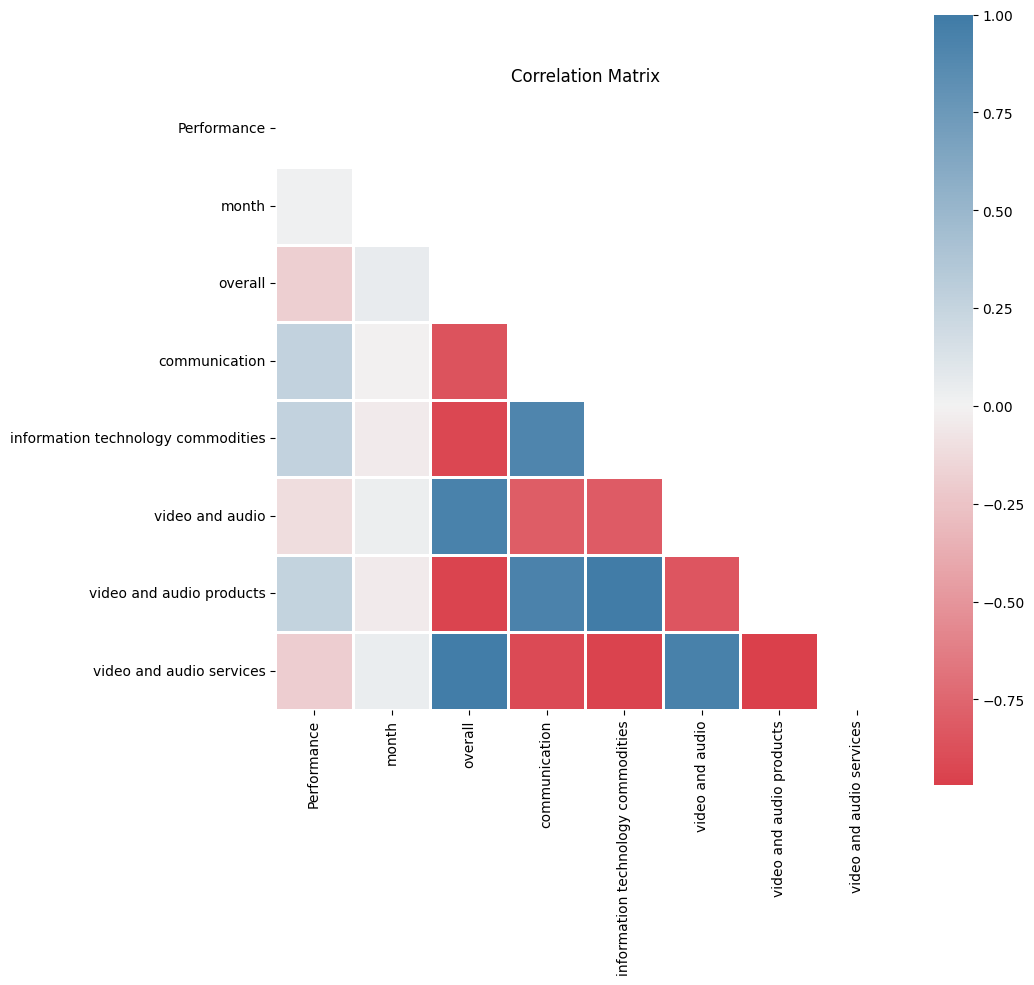

In [8]:
dd.correlation_matrix(original)

### Conditional GAN

In [9]:
discrete_columns = [
    'month'
]

ctgan = CTGAN(epochs=5000)
ctgan.fit(data, discrete_columns)

# Synthetic copy
samples = ctgan.sample(10000)
samples

,month,S&P 500,S&P 500 Information Technology (Sector),S&P 500 Performance (%),S&P 500 Information Technology (Sector) Performance (%),overall,communication,information technology commodities,video and audio,video and audio products,video and audio services,dow
0,7,1350.645630,735.107940,-1.180123,2.458365,238.753855,80.335013,66.282250,100.981273,57.385826,116.505973,3
1,11,1409.658545,653.017698,-4.725344,-4.082362,227.288863,81.007091,78.851934,99.337333,60.036407,109.276805,3
2,9,3547.552632,1888.932577,-5.943273,-14.688003,270.572380,75.519701,48.449806,111.748016,39.964752,130.393819,3
3,5,1516.952180,651.358881,-2.795898,1.426193,232.898308,80.978726,57.341201,99.257415,67.058202,106.996472,3
4,8,1445.373910,340.601018,-7.035977,-10.513595,235.525956,83.611013,80.618546,100.036631,83.974293,104.083120,3
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10,1331.980802,332.731140,-11.258783,-12.913785,220.984352,80.909424,85.944541,99.617635,75.983187,106.420042,3
9996,6,3725.159932,2024.441006,-4.769560,-10.030505,259.229967,74.129078,49.707642,105.632050,33.403097,129.592120,3
9997,10,2196.128482,568.604221,-7.458415,-6.563332,242.620000,81.106931,79.385277,100.105597,70.428001,111.494691,3
9998,2,3071.335248,922.667911,2.817651,-5.040337,263.964195,73.329719,53.905167,104.505486,40.897285,124.579106,3


In [10]:
samples['Performance'] = np.where(samples['S&P 500 Information Technology (Sector) Performance (%)'] > \
                                  samples['S&P 500 Performance (%)'], 1, 0)

In [11]:
samples = samples[['Performance','month', 'overall','communication', \
                 'information technology commodities','video and audio', 'video and audio products','video and audio services']]
samples.head()

,Performance,month,overall,communication,information technology commodities,video and audio,video and audio products,video and audio services
0,1,7,238.753855,80.335013,66.282250,100.981273,57.385826,116.505973
1,1,11,227.288863,81.007091,78.851934,99.337333,60.036407,109.276805
2,0,9,270.572380,75.519701,48.449806,111.748016,39.964752,130.393819
3,1,5,232.898308,80.978726,57.341201,99.257415,67.058202,106.996472
4,0,8,235.525956,83.611013,80.618546,100.036631,83.974293,104.083120


In [12]:
dd.data_summary(samples)

,Info
Rows,10000
Columns,8
Size in Memory,625.1 KB


,Data Type,Nulls,Zeros,Min,Median,Max,Mean,Standard Deviation,Unique,Top Frequency
Performance,int64,0,0,0,0,1,0.32,0.47,2,6789
month,int64,0,0,1,7,12,6.51,3.48,12,887
overall,float64,0,0,207.46,238.70,292.19,243.046,16.29,9999,2
communication,float64,0,0,70.64,80.76,86.55,79.087,4.17,10000,1
information technology commodities,float64,0,0,37.90,63.59,108.29,68.58,16.45,10000,1
video and audio,float64,0,0,98.088,100.37,115.21,102.92,4.078,10000,1
video and audio products,float64,0,0,22.28,61.63,108.67,58.72,19.21,10000,1
video and audio services,float64,0,0,94.33,113.74,148.72,117.31,11.90,9999,2


None

data-describe Summary Widget

<AxesSubplot: title={'center': 'Correlation Matrix'}>

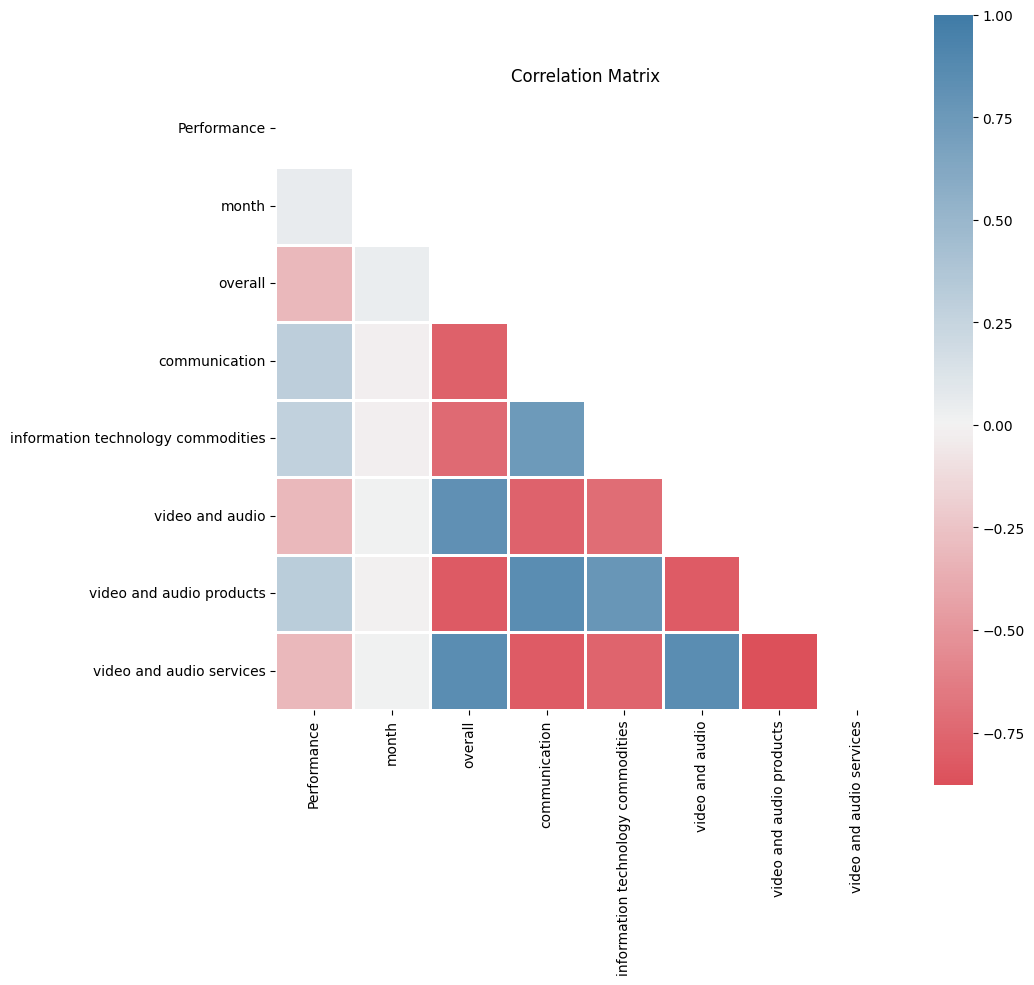

In [13]:
dd.correlation_matrix(samples)

In [14]:
X = samples.drop(['Performance'],axis=1)
y = samples['Performance']

### SMOTE Oversampling

In [15]:
counter = Counter(y)
print(counter)
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({0: 6789, 1: 3211})
Counter({1: 6789, 0: 6789})


### Interaction Terms

In [16]:
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
X_poly = poly.fit_transform(X.drop(['month'],axis=1))
X_poly

array([[  238.75385499,    80.33501251,    66.28225006, ...,
         5794.89374447, 11764.92141867,  6685.79145013],
       [  227.28886291,    81.0070907 ,    78.85193375, ...,
         5963.85652266, 10855.26635315,  6560.58669104],
       [  270.57238033,    75.51970063,    48.44980554, ...,
         4465.98176449, 14571.25057293,  5211.15669523],
       ...,
       [  223.02270946,    84.13328213,    87.0706575 , ...,
         7138.92048564, 10766.81081446,  7792.65031571],
       [  231.02924652,    82.05967781,    69.80275442, ...,
         7032.73905614, 10787.11159111,  7560.63735484],
       [  234.71398075,    82.03061142,    61.34505799, ...,
         6502.31941291, 10834.16012337,  7163.25582185]])

In [17]:
month = X['month'].to_numpy()
month = np.reshape(month,(-1,1))
X = np.append(X_poly,month,1)
X.shape

(13578, 22)

In [18]:
X_real = original.drop(['Performance'],axis=1)
y_real = original['Performance']
X_real_poly = poly.fit_transform(X_real.drop(['month'],axis=1))
month = X_real['month'].to_numpy()
month = np.reshape(month,(-1,1))
X_real = np.append(X_real_poly,month,1)
X_real.shape

(144, 22)

In [19]:
stscaler = StandardScaler().fit(X)
X = stscaler.transform(X)
X_real = stscaler.transform(X_real)

### Training with CV

In [20]:
random_state = 42
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = random_state)
classifiers = []

classifiers.append(KNeighborsClassifier())
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(BaggingClassifier(random_state=random_state))
classifiers.append(SVC(random_state=random_state))
classifiers.append(GaussianNB())

k_fold = StratifiedKFold(n_splits=10)

Model_Comparison = pd.DataFrame(columns=['Name', 'CV Mean Accuracy', 'CV Mean Precision', 'CV Mean Recall',\
                                         'CV Mean F-1 Score', \
                                         'Accuracy', 'Precision', 'Recall', 'F-1 Score',\
                                        'Accuracy Real', 'Precision Real', 'Recall Real', 'F-1 Score Real'])
row = 0
for clf in classifiers:
    name = clf.__class__.__name__
    Model_Comparison.loc[row, 'Name'] = name
    
    Model_Comparison.loc[row, 'CV Mean Accuracy'] = cross_val_score(clf, X, y, scoring = 'accuracy', \
                                                                 cv = k_fold, n_jobs = 10).mean()
    Model_Comparison.loc[row, 'CV Mean Precision'] = cross_val_score(clf, X, y, scoring = 'precision',\
                                                                 cv = k_fold, n_jobs = 10).mean()
    Model_Comparison.loc[row, 'CV Mean Recall'] = cross_val_score(clf, X, y, scoring = 'recall', \
                                                                 cv = k_fold, n_jobs = 10).mean()
    Model_Comparison.loc[row, 'CV Mean F-1 Score'] = cross_val_score(clf, X, y, scoring = 'f1', \
                                                                 cv = k_fold, n_jobs = 10).mean()

    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    Model_Comparison.loc[row, 'Accuracy'] = accuracy_score(y_test, y_pred)
    Model_Comparison.loc[row, 'Precision'] = precision_score(y_test, y_pred)
    Model_Comparison.loc[row, 'Recall'] = recall_score(y_test, y_pred)
    Model_Comparison.loc[row, 'F-1 Score'] = f1_score(y_test, y_pred)
    
    y_pred = clf.predict(X_real)
    Model_Comparison.loc[row, 'Accuracy Real'] = accuracy_score(y_real, y_pred)
    Model_Comparison.loc[row, 'Precision Real'] = precision_score(y_real, y_pred)
    Model_Comparison.loc[row, 'Recall Real'] = recall_score(y_real, y_pred)
    Model_Comparison.loc[row, 'F-1 Score Real'] = f1_score(y_real, y_pred)
    
    row += 1
Model_Comparison

,Name,CV Mean Accuracy,CV Mean Precision,CV Mean Recall,CV Mean F-1 Score,Accuracy,Precision,Recall,F-1 Score,Accuracy Real,Precision Real,Recall Real,F-1 Score Real
0,KNeighborsClassifier,0.729271,0.687533,0.83901,0.755257,0.714875,0.670108,0.821084,0.737953,0.513889,0.319444,0.522727,0.396552
1,DecisionTreeClassifier,0.702318,0.690644,0.730898,0.709527,0.674521,0.657224,0.698795,0.677372,0.583333,0.375,0.545455,0.444444
2,RandomForestClassifier,0.784657,0.755543,0.84019,0.7947,0.757879,0.725027,0.813253,0.76661,0.604167,0.389831,0.522727,0.446602
3,AdaBoostClassifier,0.691854,0.673121,0.746352,0.707802,0.693667,0.66977,0.736747,0.701664,0.583333,0.385714,0.613636,0.473684
4,GradientBoostingClassifier,0.707469,0.687722,0.760051,0.721962,0.706922,0.682592,0.748795,0.714163,0.583333,0.385714,0.613636,0.473684
5,ExtraTreesClassifier,0.80793,0.776318,0.864054,0.81696,0.777025,0.742611,0.83253,0.785004,0.597222,0.37037,0.454545,0.408163
6,BaggingClassifier,0.752399,0.752173,0.750782,0.750593,0.739617,0.726371,0.75,0.737996,0.583333,0.351852,0.431818,0.387755
7,SVC,0.669759,0.635032,0.798345,0.707295,0.670103,0.624539,0.815663,0.707419,0.534722,0.364706,0.704545,0.48062
8,GaussianNB,0.664604,0.638291,0.759754,0.693629,0.665096,0.628375,0.771084,0.692453,0.590278,0.402597,0.704545,0.512397


### Voting Classifier

In [21]:
et_clf = ExtraTreesClassifier(random_state=random_state)
bag_clf = BaggingClassifier(random_state=random_state)
rf_clf = RandomForestClassifier(random_state=random_state)
classifiers = [('RF', rf_clf), \
               ('ET', et_clf),\
              ('Bagging', bag_clf)]

vc = VotingClassifier(estimators = classifiers, voting = 'soft')     
vc.fit(x_train, y_train)
y_pred = vc.predict(x_test)
vc_res = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F-1 Score'])
vc_res.loc[0, 'Accuracy'] = accuracy_score(y_test, y_pred)
vc_res.loc[0, 'Precision'] = precision_score(y_test, y_pred)
vc_res.loc[0, 'Recall'] = recall_score(y_test, y_pred)
vc_res.loc[0, 'F-1 Score'] = f1_score(y_test, y_pred)
vc_res

,Accuracy,Precision,Recall,F-1 Score
0,0.771723,0.734499,0.83494,0.781505
